Здесь мы будем проводить разведочный анализ наших данных

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

sns.set_theme()

In [55]:
path_to_file = '../data/raw/train.csv'

df = pd.read_csv(path_to_file)
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [56]:
# Выводит названия столбцов, содержащих NaN
print(columns_with_NaN := df.columns[df.isnull().any()].tolist())

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


Есть пропуски в LotFrontage и Alley

array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>],
       [<Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>],
       [<Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>],
       [<Axes: title={'center': 'BsmtHalfBath'}>,
        <Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,

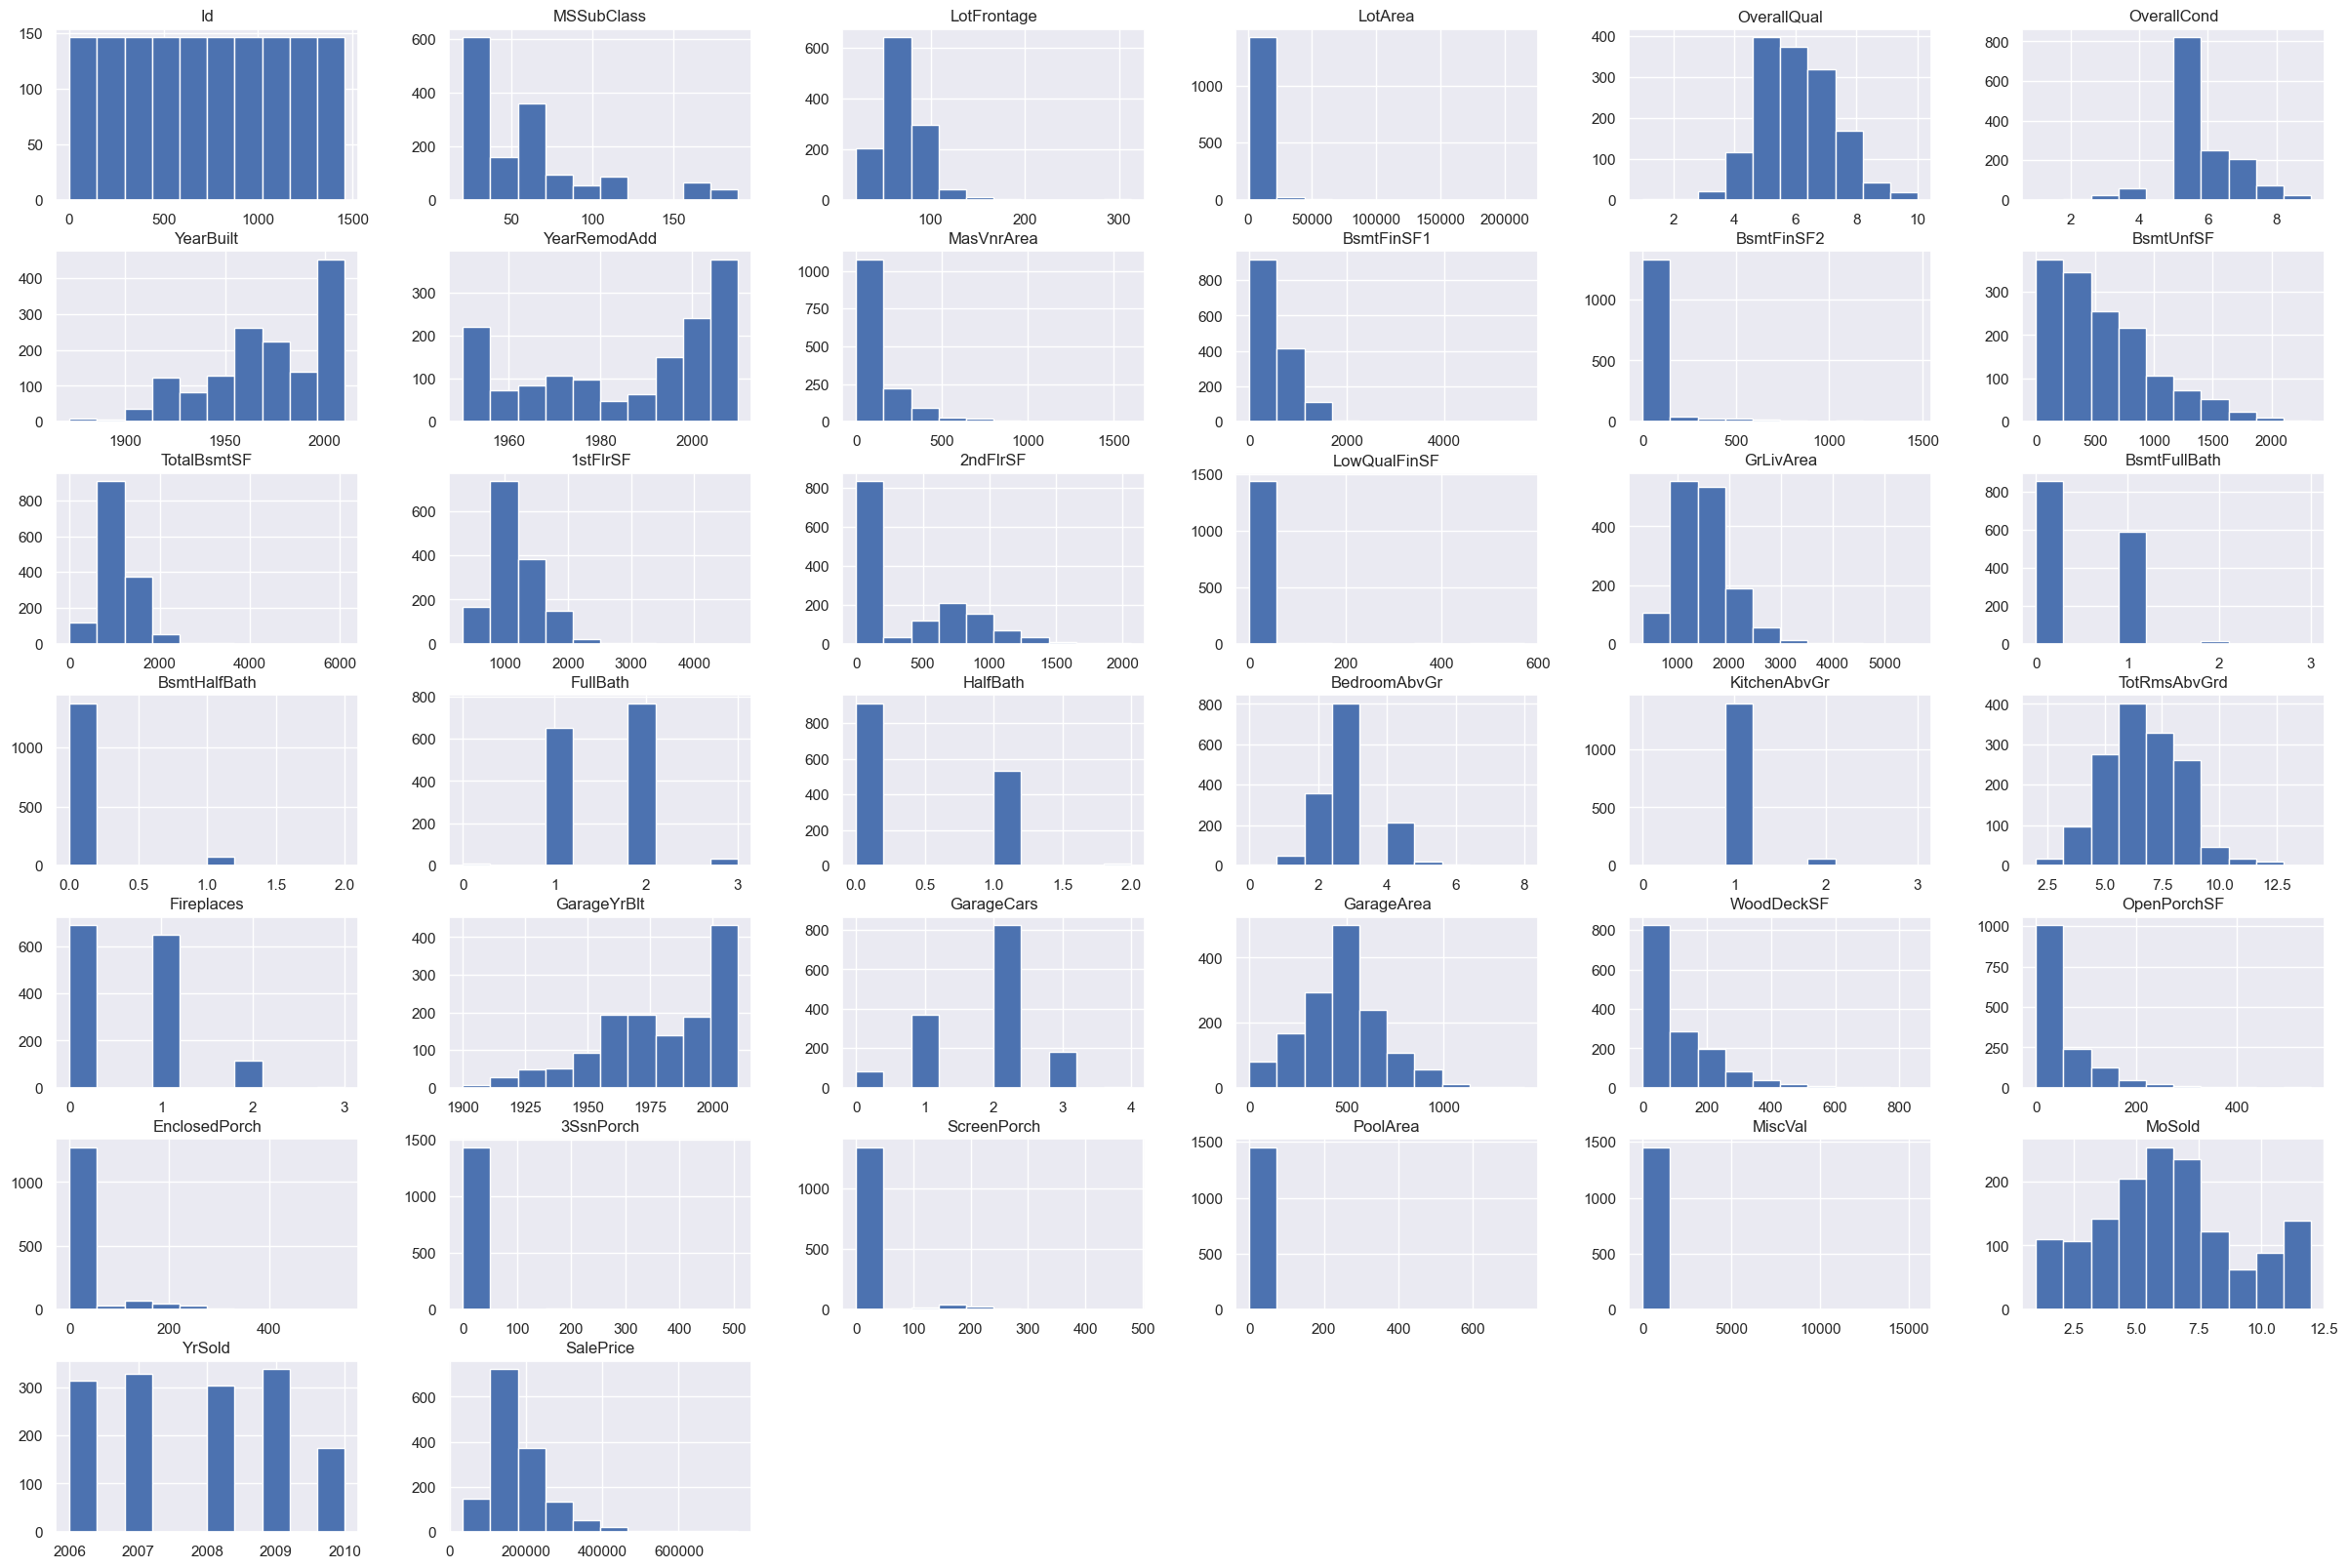

In [57]:
df.hist(figsize=(30, 20))

<Axes: ylabel='SalePrice'>

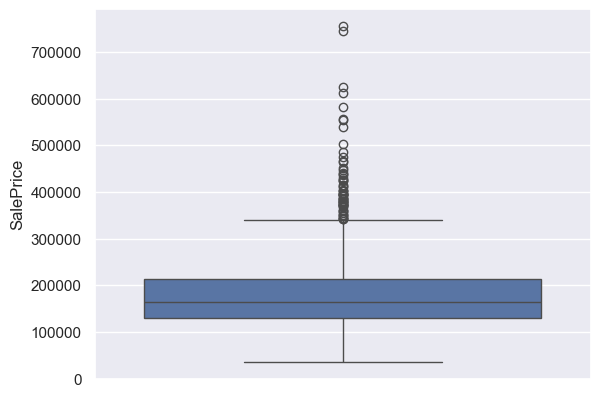

In [58]:
sns.boxplot(df['SalePrice'])

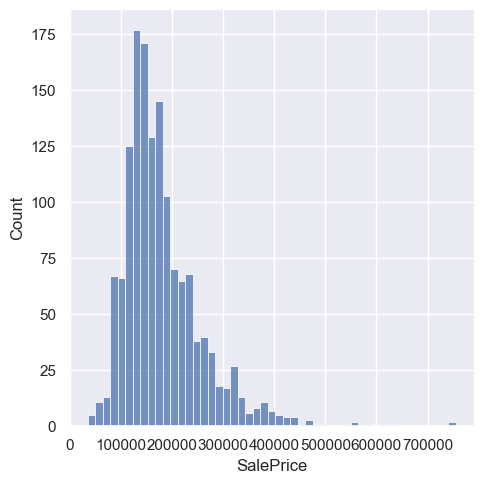

In [59]:
sns.displot(df['SalePrice'])

Видим сильную несимметрию распределения цен. Можем прологарифмировать и сделать более симметричным.

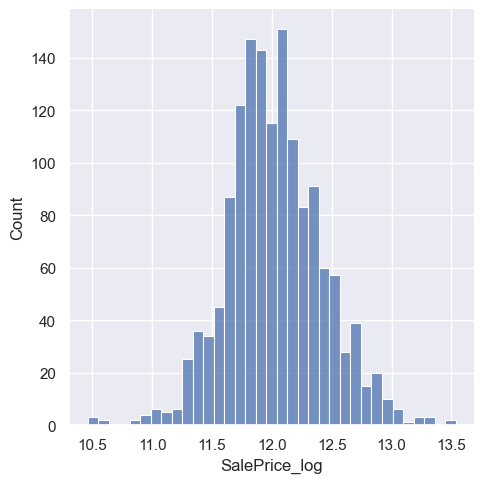

In [60]:
df['SalePrice_log'] = np.log1p(df['SalePrice'])
sns.displot(df['SalePrice_log'])

Text(0.5, 1.0, 'Features with NaN values')

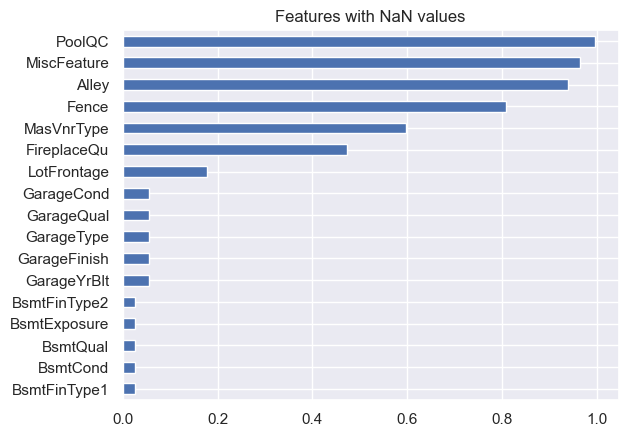

In [61]:
columns_with_NaN = df.isna().sum().sort_values() / df.shape[0]
columns_with_NaN[columns_with_NaN > 0.01].plot(kind='barh')
plt.title("Features with NaN values")

Поочередно рассмотрим все столбцы и очистим от повторов и т.п.

In [62]:
df = df.drop(['Street', 'Utilities', 'Id', 'PoolQC', "MiscFeature", "Alley", "Fence", "MasVnrType", "FireplaceQu"], axis=1)

In [63]:
THRESHOLD = 3

def throw_outliers(df, threshold=THRESHOLD):
    """
    Удаляет строки, содержащие Z-score выброс (> threshold)
    хотя бы в одном числовом столбце.
    """
    numeric_cols = df.select_dtypes(include=np.number).columns
    z_scores = df[numeric_cols].apply(lambda x: (x - x.mean()) / x.std()).abs()
    outlier_mask = (z_scores > threshold).any(axis=1)
    df_clean = df[~outlier_mask].copy()
    
    print(f"Исходное кол-во строк: {len(df)}")
    print(f"Удалено строк: {outlier_mask.sum()}")
    print(f"Осталось строк: {len(df_clean)}")
    
    return df_clean

Исходное кол-во строк: 1460
Удалено строк: 446
Осталось строк: 1014


array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>],
       [<Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>],
       [<Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'Bedroo

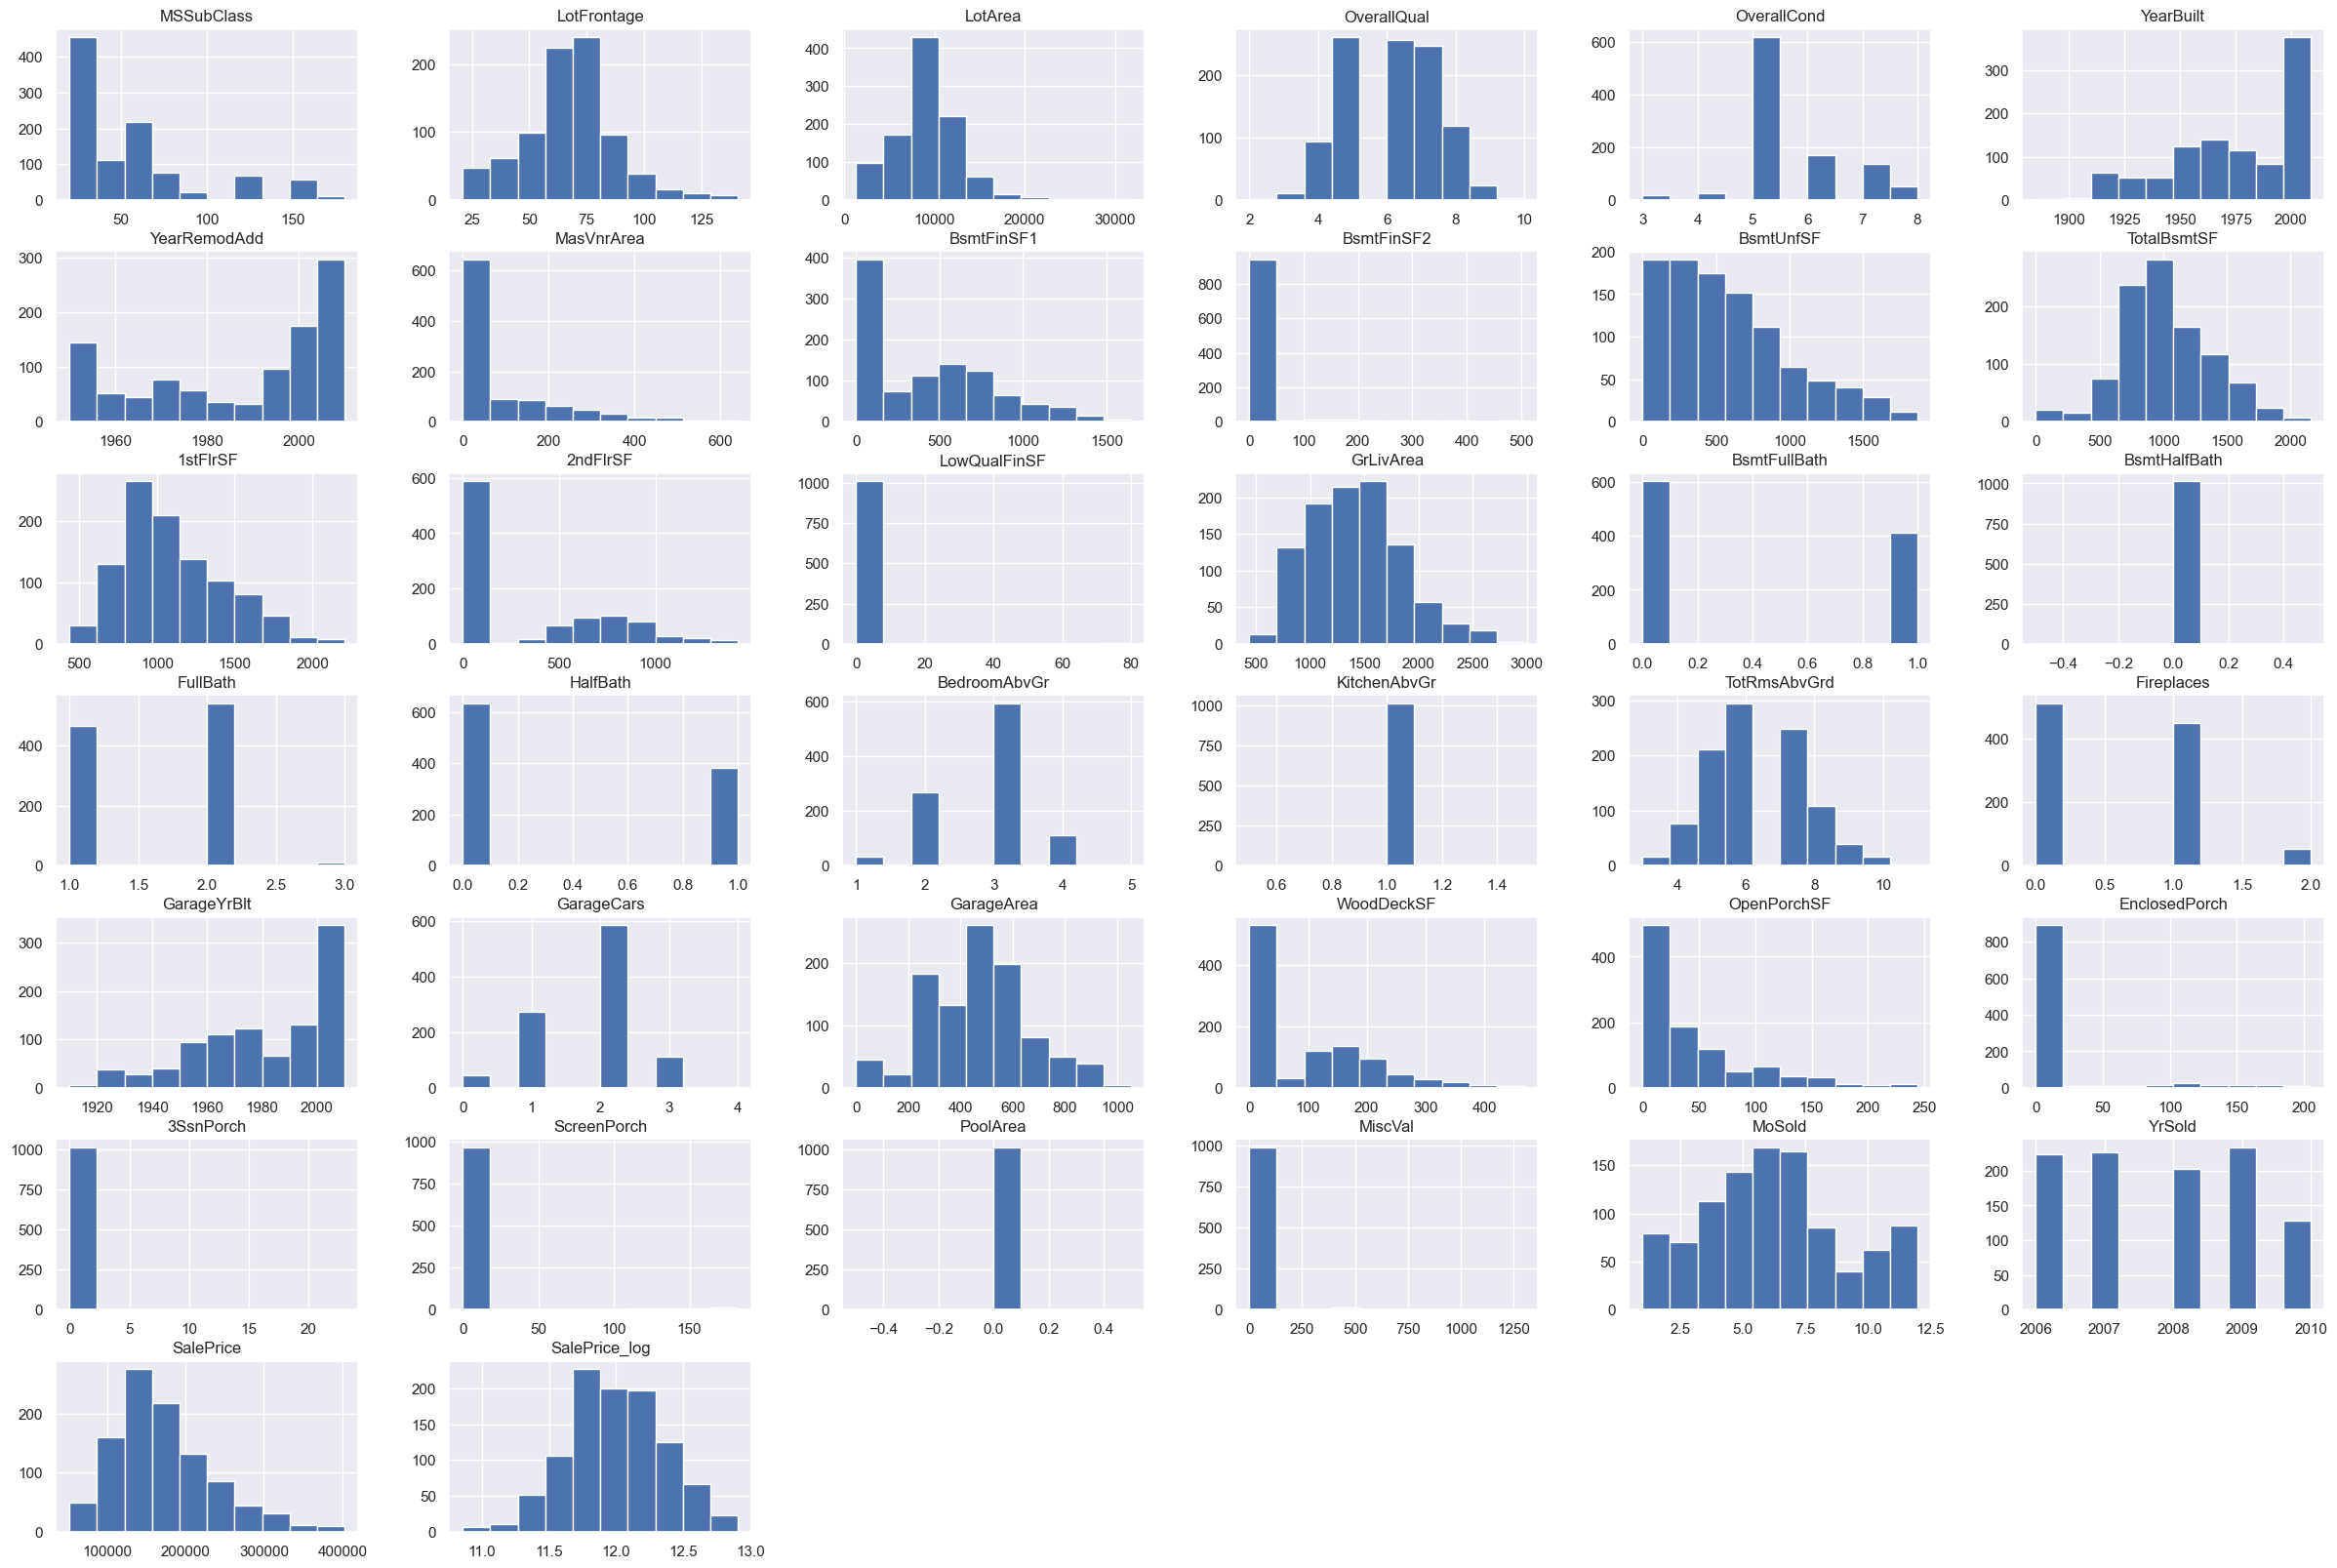

In [74]:
cleaned_df = throw_outliers(df, 3)
cleaned_df.hist(figsize=(30, 20))

Построим матрицу корелляции между параметрами. Судя по гистограммам здесь много линейнозависимых признаков

<Axes: >

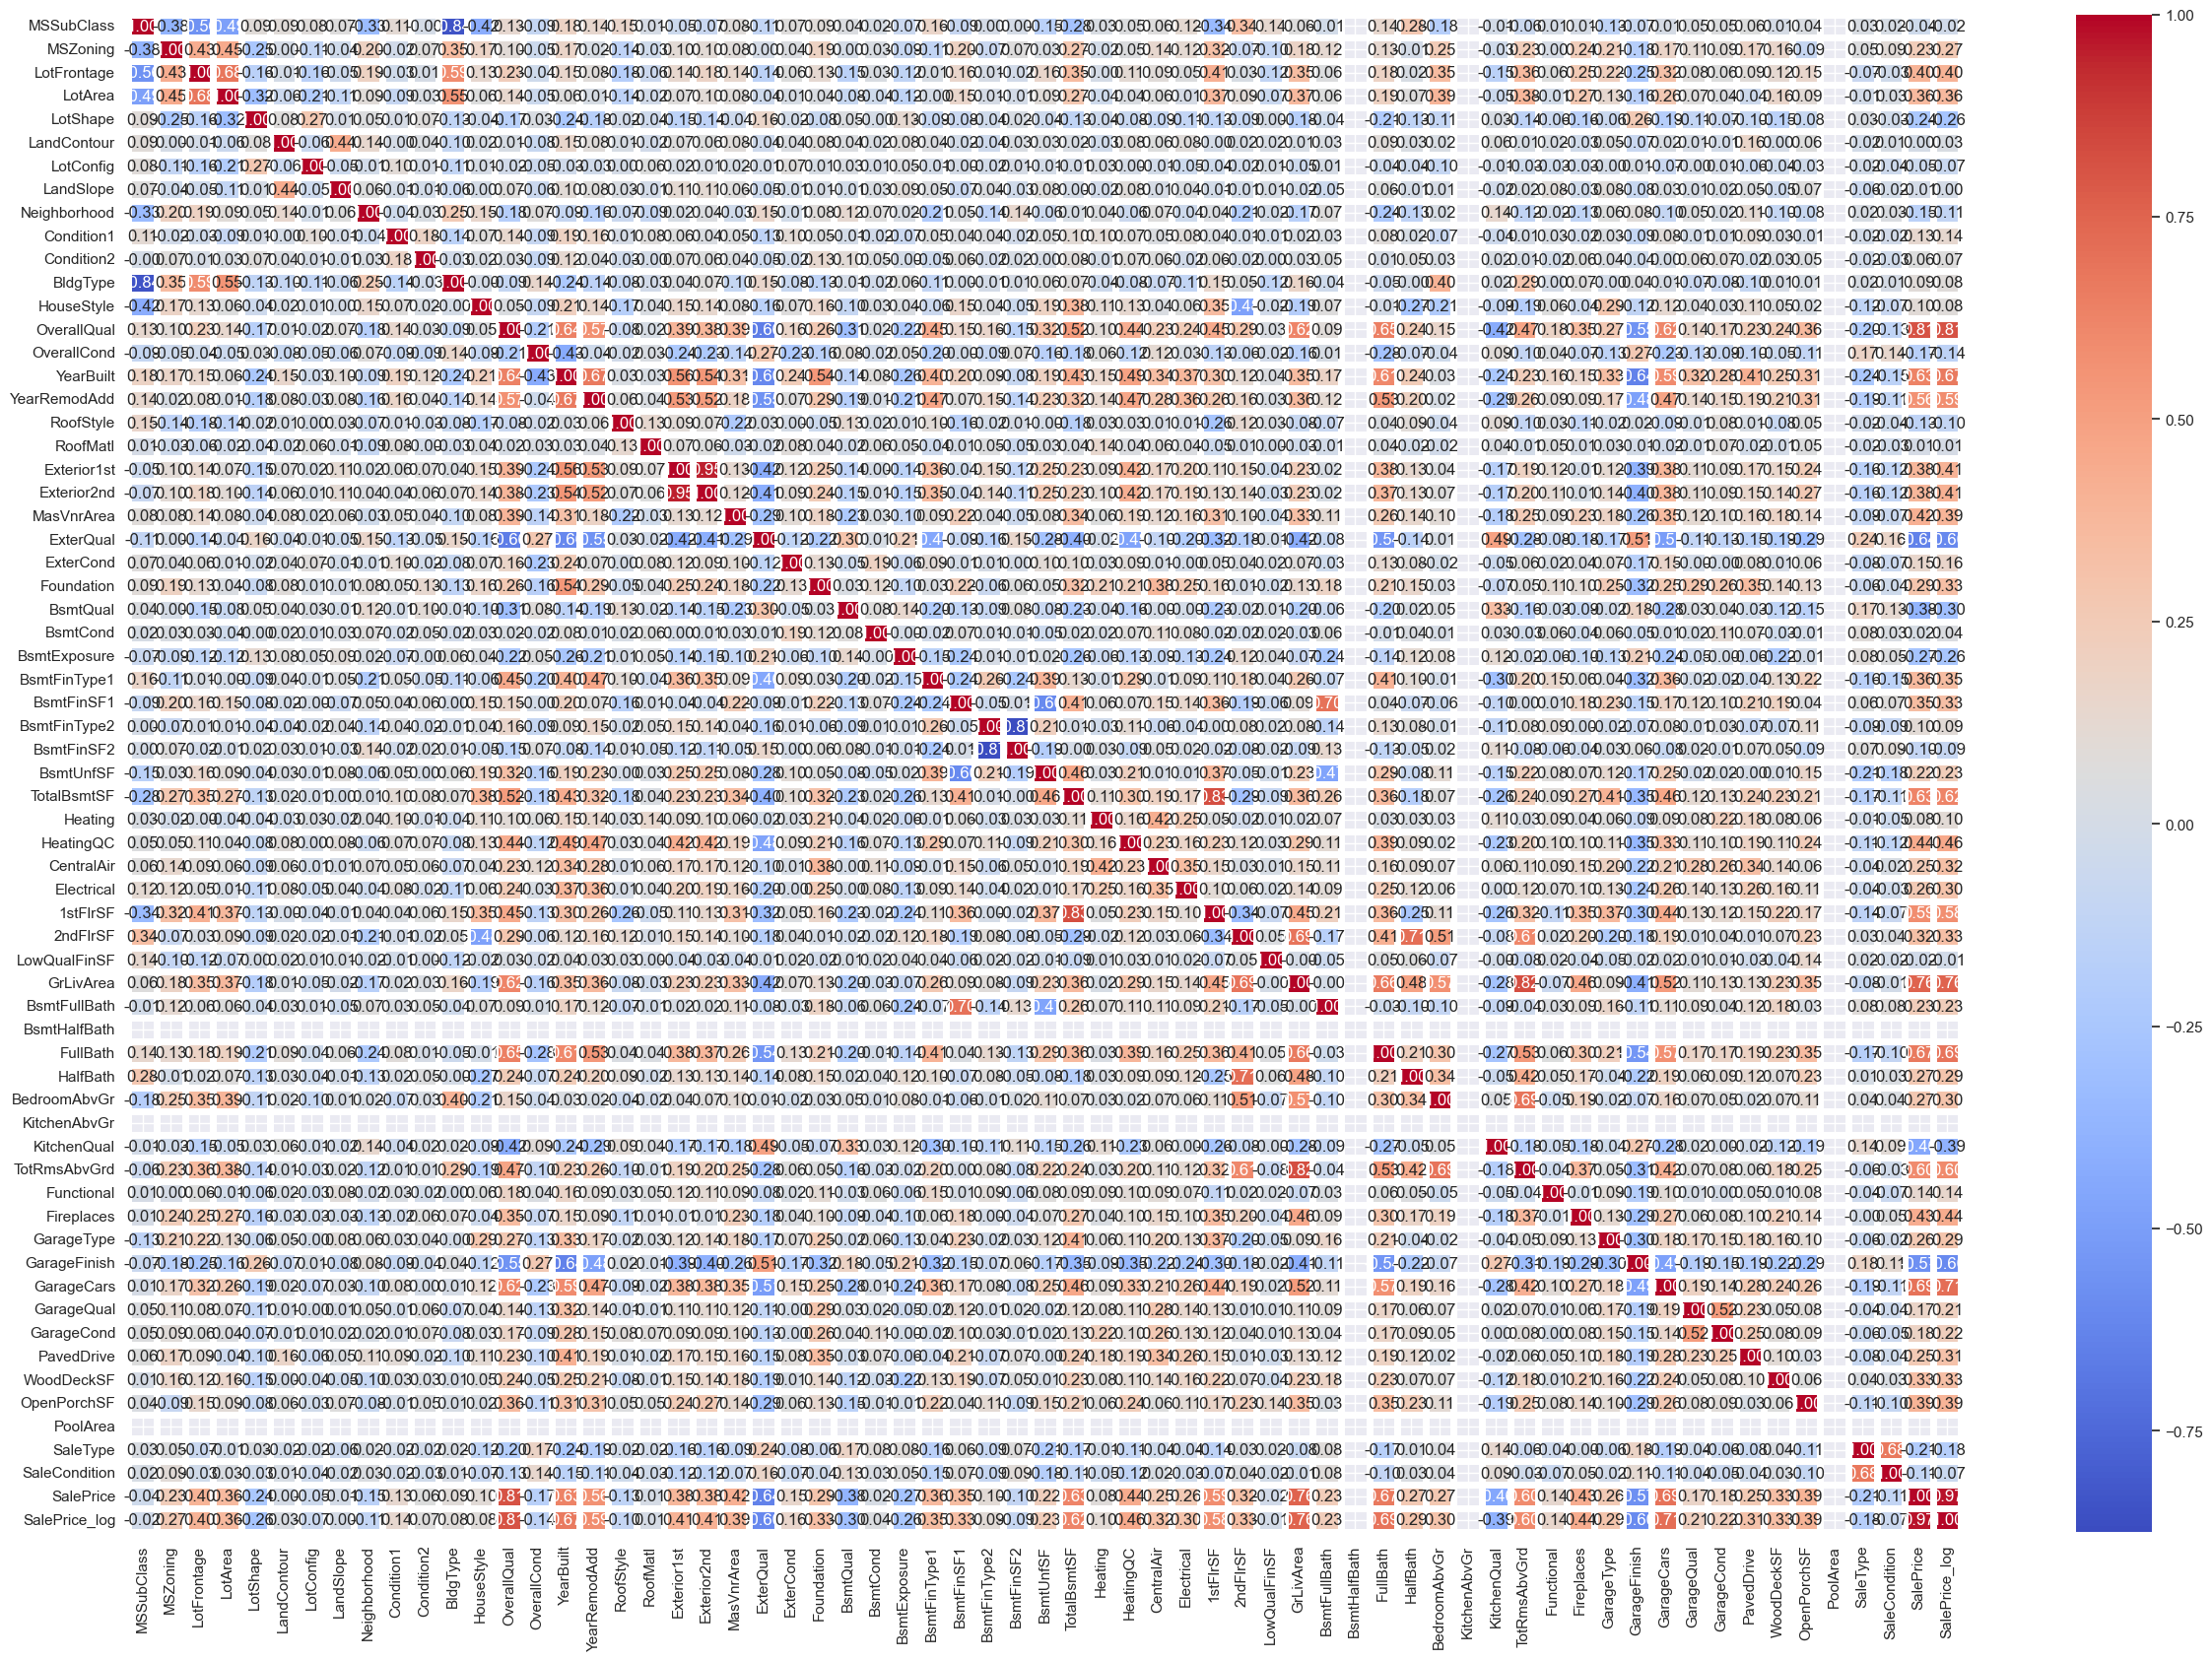

In [73]:
plt.figure(figsize=(30, 20))
sns.heatmap(
    cleaned_df.select_dtypes(include=np.number).corr(),
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    linewidths=5,
    cbar=True
)

Отбросим малокореллирующие с целевой переменной и линейно зависимые между друг друга признаки: YrSold, MoSold, MiscVal, ScreenPorch, 3SsnPorch, EnclosedPorch

In [75]:
cleaned_df = cleaned_df.drop(['YrSold', 'MoSold', 'MiscVal', 'ScreenPorch', '3SsnPorch', 'EnclosedPorch'], axis=1)

Также преобразуем или удалим некоторые значения, которые явно зависят друг от друга:

In [76]:
cleaned_df = cleaned_df.drop(['GarageArea', 'GarageYrBlt'], axis=1)

In [77]:
cleaned_df['Baths'] = cleaned_df['FullBath'] + cleaned_df['BsmtFullBath'] + 0.5 * (cleaned_df['HalfBath'] + cleaned_df['BsmtHalfBath'])
cleaned_df['UnfSF'] = cleaned_df['BsmtUnfSF'] + cleaned_df['LowQualFinSF']

cleaned_df = cleaned_df.drop(['Baths', 'UnfSF'], axis=1)


Теперь начнем обработку категориальных признаков:

In [78]:
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Категориальные признаки:", categorical_features)

Категориальные признаки: ['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


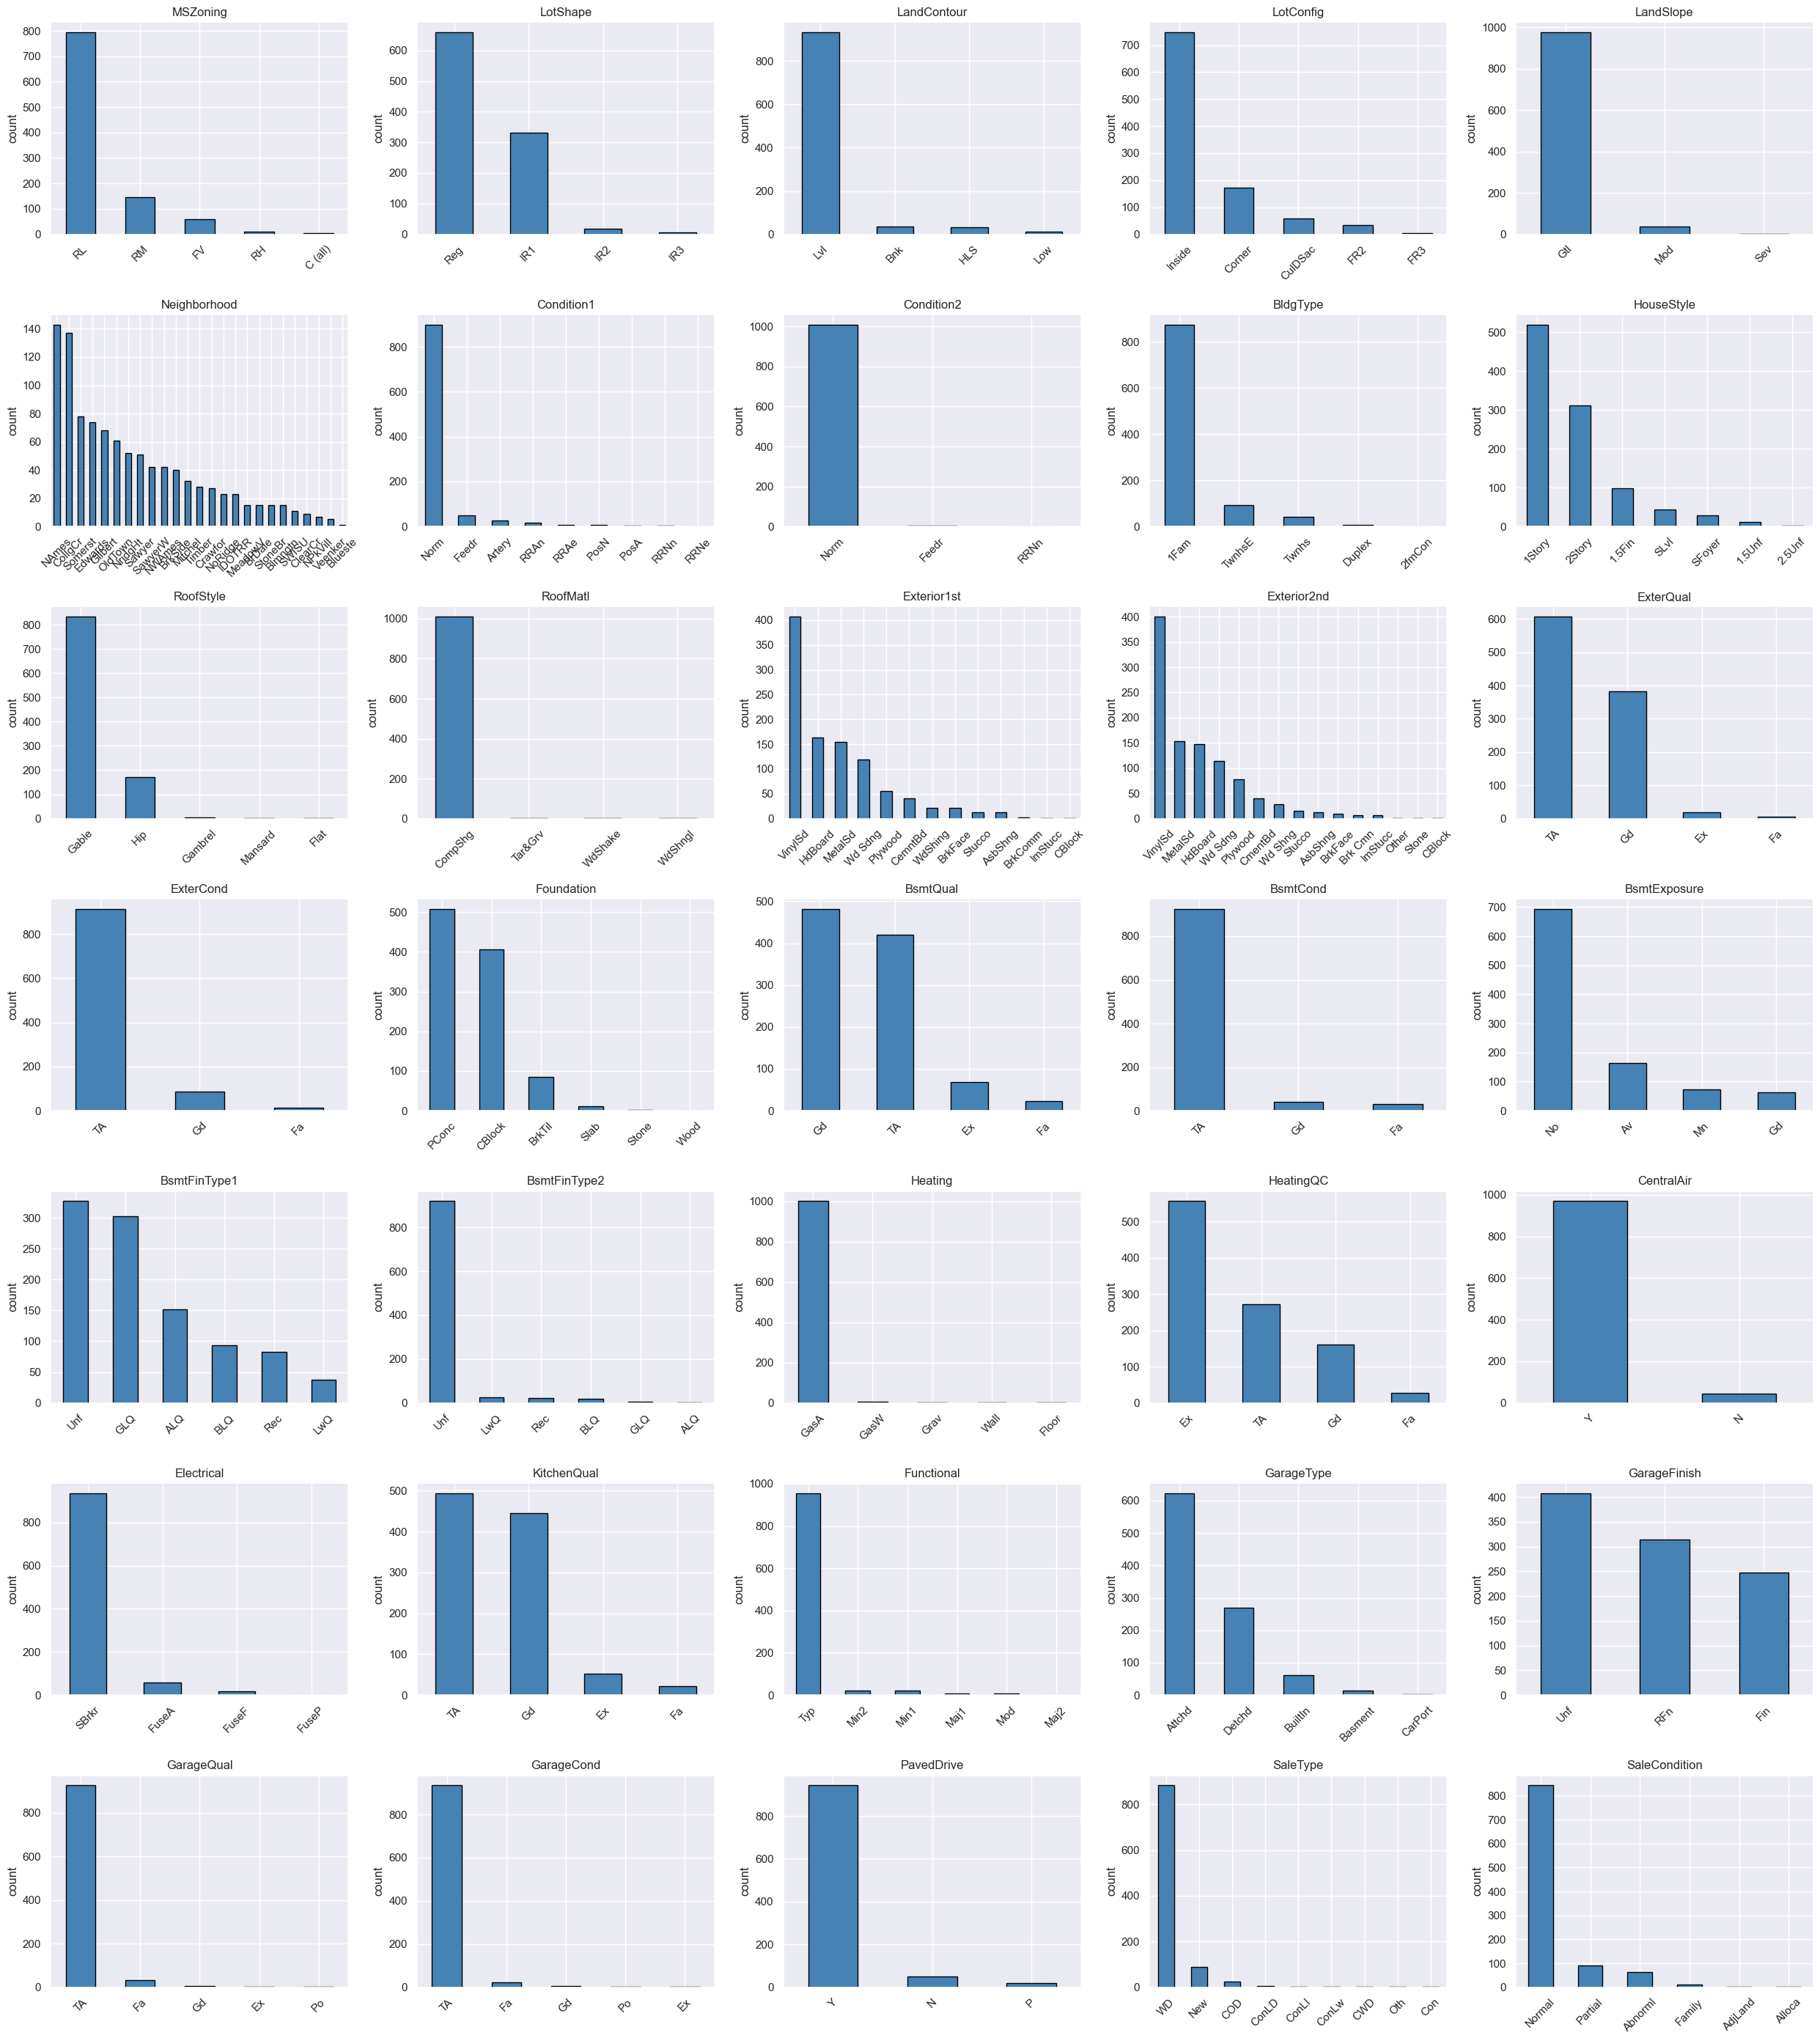

In [70]:
import matplotlib.pyplot as plt

# Пусть у тебя есть датафрейм cleaned_df и список категориальных признаков
# Например:
# categorical_features = ['sector', 'trend', 'region', 'market', 'source']

# Настройки сетки
cols = 5  # сколько графиков в строке
rows = (len(categorical_features) + cols - 1) // cols  # автоподбор строк

# Создаём фигуру и сетку подграфиков
fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
axes = axes.flatten()

# Строим графики
for i, col in enumerate(categorical_features):
    cleaned_df[col].value_counts().plot(
        kind='bar',
        color='steelblue',
        edgecolor='black',
        ax=axes[i]
    )
    axes[i].set_title(f'{col}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('count')
    axes[i].tick_params(axis='x', rotation=45)

# Убираем лишние пустые оси, если признаков меньше, чем ячеек
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Видим множество несбалансированных данных. Очень много данных к которым можем применить частотное кодирование. Также будем использовать CatBoost для пропуска этой части обработки данных.

In [83]:
for col in categorical_features:
    cleaned_df[col] = cleaned_df[col].map(df[col].value_counts(normalize=False))

In [84]:
cleaned_df.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,PoolArea,SaleType,SaleCondition,SalePrice,SalePrice_log
0,60,1151,65.0,8450,925,1311,1052,1382,150,1260,...,1311.0,1326.0,1340,0,61,0,1267,1198,208500,12.247699
2,60,1151,68.0,11250,484,1311,1052,1382,150,1260,...,1311.0,1326.0,1340,0,42,0,1267,1198,223500,12.317171
4,60,1151,84.0,14260,484,1311,47,1382,41,1260,...,1311.0,1326.0,1340,192,84,0,1267,1198,250000,12.429220
6,20,1151,75.0,10084,925,1311,1052,1382,86,1260,...,1311.0,1326.0,1340,255,57,0,1267,1198,307000,12.634606
10,20,1151,70.0,11200,925,1311,1052,1382,74,1260,...,1311.0,1326.0,1340,0,0,0,1267,1198,129500,11.771444


In [88]:
from catboost import CatBoostRegressor

y = cleaned_df['SalePrice_log']
X = cleaned_df.drop(['SalePrice', 'SalePrice_log'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=2)
model.fit(X_train, y_train)

0:	learn: 0.3385558	total: 1.22ms	remaining: 1.22s
1:	learn: 0.3235904	total: 2.11ms	remaining: 1.05s
2:	learn: 0.3068486	total: 2.83ms	remaining: 942ms
3:	learn: 0.2932246	total: 3.52ms	remaining: 877ms
4:	learn: 0.2789371	total: 4.2ms	remaining: 835ms
5:	learn: 0.2668842	total: 4.94ms	remaining: 818ms
6:	learn: 0.2556140	total: 5.74ms	remaining: 815ms
7:	learn: 0.2461280	total: 6.5ms	remaining: 806ms
8:	learn: 0.2355888	total: 7.22ms	remaining: 796ms
9:	learn: 0.2280857	total: 7.91ms	remaining: 783ms
10:	learn: 0.2212087	total: 8.47ms	remaining: 761ms
11:	learn: 0.2142941	total: 9.03ms	remaining: 743ms
12:	learn: 0.2081596	total: 9.66ms	remaining: 733ms
13:	learn: 0.2024174	total: 10.3ms	remaining: 729ms
14:	learn: 0.1966834	total: 11.1ms	remaining: 730ms
15:	learn: 0.1913105	total: 11.8ms	remaining: 728ms
16:	learn: 0.1863795	total: 12.6ms	remaining: 728ms
17:	learn: 0.1816970	total: 13.2ms	remaining: 718ms
18:	learn: 0.1776793	total: 13.8ms	remaining: 712ms
19:	learn: 0.1736321	tot

In [95]:
from sklearn.metrics import mean_absolute_error
y_pred = model.predict(X_test)
print(mean_absolute_error(np.exp(y_pred), np.exp(y_test)))

11179.121663156535
